###Here we ar e just importing the necessary libraries required

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

### I have stored the data given to us on canvas in a csv file and i used pandas to load it and plot the data to get a rough idea of the clusters

In [0]:
data = pd.read_csv("gaussian.csv",header=None)
plt.plot(data.values[:,0],data.values[:,1])

In [14]:
data = np.array(data)
data

array([[ 1.34397344,  0.15110434],
       [ 0.96267177,  0.38278123],
       [ 0.50232576, -0.1813927 ],
       ...,
       [-3.99595629,  3.21112544],
       [-3.0057663 ,  1.72039831],
       [-3.29047557,  0.73752213]])

In [15]:
data.shape[0]

1250

###This is where the real game begins, i have created a class to help with EM

In [0]:
class gaussian_mixture():
  def __init__(self,X,k): #here the inital parameters are the data, no of clusters
    self.X= X #data is assigned
    self.K = k #here we assign the number of clusters
    self.resp = None #this is the gamma values or the responsibility
    self.log = [] #this is to check convergence of the algorithm over many iterations
    self.parameters_i = self.params_initial() #here we initialize the data randomly 
    #There is a better way to initialize the data, we can use kmeans from sklearn to find the initial params.
    #This way we are not far off from out estimates and convergence is fast
  
  def params_initial(self):
    dimension = self.X.shape[1] 
    parameters_i = {} #this is a dictionary to store the means, covariances and the probability of clusters
    mixing_coeff_pi =np.random.random(size=(self.K,1)) #initialize the prob of clusters
    mixing_coeff_pi /= sum(mixing_coeff_pi) #divide by the sum to make it add to 1
    minimum_data = np.min(self.X,axis=0)
    maximum_data = np.max(self.X,axis=0)
    
    for i in range(1,self.K +1):
      parameters_i['means_{}'.format(i)] = np.random.uniform(minimum_data,maximum_data) # random means
      parameters_i['covars_{}'.format(i)] = np.random.uniform(0,1,size=(dimension,dimension)) + np.eye(dimension) #random covariance
      parameters_i['mixing_coeff_pi_{}'.format(i)] = mixing_coeff_pi[i-1] #here we are assigning prob to the dict
    return parameters_i
  def expectation(self): #This is the E step in the EM
    expectation_values = np.zeros((self.X.shape[0],self.K)) #this will be a 1250 x 5 array
    #we will Soft assign each point wiht a probability to the clusters present
    
    for k in range(1,self.K+1): #for each cluster we iterate
      for n in range(self.X.shape[0]): #here we iterate through the total points
        x_value = self.X[n,:]
        denominator_sum =0.0
        for j in range(1,self.K +1):
          pi_j = self.parameters_i['mixing_coeff_pi_{}'.format(j)] #here we estimated the prob of clusters
          means_j = self.parameters_i['means_{}'.format(j)] #means of clusters
          covars_j = self.parameters_i['covars_{}'.format(j)] #covars of clusters
          pdf = stats.multivariate_normal.pdf(x_value,mean=means_j,cov = covars_j)
          if j ==k:
            numerator = pi_j*pdf
          denominator_sum += pi_j*pdf
        responsibility_nk = numerator / float(denominator_sum) #assign sigma value to each cluster
        expectation_values[n,k-1] = responsibility_nk #this is then assigned to the particular datapoint
    return expectation_values
  def maximization(self): #in the maximization step we do simple update of the parameters wrt to the old ones
    updated_values={}
    
    for k in range(1,self.K+1):
      n_k= sum(self.resp[:,k-1])
      new_mean = (np.dot(self.X.T,self.resp[:,k-1]))/(n_k) #update means
      covar_new_numer =0.0
      for n in range(self.X.shape[0]):
        x_n = self.X[n,:]
        covar_mean_diff = x_n - new_mean
        covar_new_numer += self.resp[n,k-1]*(np.outer(covar_mean_diff,covar_mean_diff))
      covariance_new_k = covar_new_numer/n_k #update covariances
      
      mixing_coeff_new_k = n_k / self.X.shape[0]
      
      updated_values['means_{}'.format(k)] = new_mean
      updated_values['covars_{}'.format(k)] = covariance_new_k
      updated_values['mixing_coeff_pi_{}'.format(k)] = mixing_coeff_new_k
    return updated_values
   
  def log_likelihood(self): #this function is to see if the likelihood is increasing over time
    log_likelihood=[]
    mixing_coeff_pi=[]
    means= []
    covars=[]
    for i in range(1,6):
      mixing_coeff_pi.append(self.parameters_i['mixing_coeff_pi_{}'.format(i)])
      means.append(self.parameters_i['means_{}'.format(i)])
      covars.append(self.parameters_i['covars_{}'.format(i)])
   
      
    log_likelihood.append(np.log(np.sum([k*stats.multivariate_normal(means[i],covars[j]).pdf(self.X)
                                       for k,i,j in zip(mixing_coeff_pi,range(len(means)),
                                                        range(len(covars)))])))
    return log_likelihood
    
  def run_it(self,n_iter):
    
    for x in range(n_iter+1): #here we iterate through the number specified by the user
      self.resp = self.expectation();
      self.parameters_i = self.maximization()
      self.log.append(self.log_likelihood())
    
    return self.parameters_i,self.log #return the best parameters and the log likelihood to check convergence
      
        
          
  

# New Section

In [0]:
gaussian_object = gaussian_mixture(data,5) #create an gaussian_mixture object with 5 clusters

In [0]:
best_param,log = gaussian_object.run_it(50) #run it for 50 iterations

In [19]:
log

[[2.4058682891212104],
 [2.451853538005329],
 [2.4981184131199154],
 [2.545704763843741],
 [2.5875425047670473],
 [2.6233376970210336],
 [2.660123484341195],
 [2.7019803435758347],
 [2.741134539395408],
 [2.770155109697984],
 [2.7936000634487708],
 [2.8161069413935524],
 [2.839269320361003],
 [2.8651796415915016],
 [2.888085679291981],
 [2.905227077916846],
 [2.919698340790355],
 [2.935598185828589],
 [2.9589580940176927],
 [2.9900041009677194],
 [3.012304923415506],
 [3.022220153616049],
 [3.0275399095321145],
 [3.030682848914231],
 [3.0326194742378028],
 [3.0340183247581374],
 [3.0353103499973306],
 [3.036804518744763],
 [3.038791744689585],
 [3.041516603085315],
 [3.0450675636731446],
 [3.0493773317106254],
 [3.0542821129041657],
 [3.059510518318157],
 [3.0646578720657334],
 [3.0692486587892884],
 [3.0729059348545955],
 [3.075506659668991],
 [3.077181128541347],
 [3.07818110540963],
 [3.0787504316881984],
 [3.0790676415977116],
 [3.0792444725986274],
 [3.079344741183498],
 [3.079403

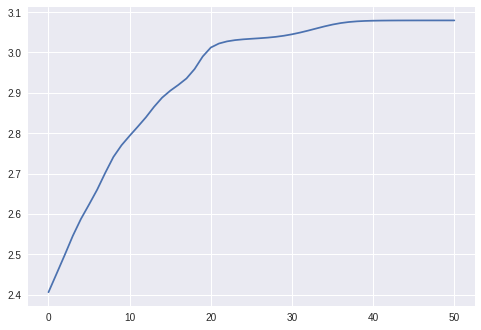

In [20]:
plt.plot(log) #plot the log to check if it increases after every iteration
# It can be seen that after 40 iterations it is almost stagnant

In [21]:
best_param #print the best parameters after convergence

{'covars_1': array([[8.86203613e-01, 4.27366400e-04],
        [4.27366400e-04, 8.78356071e-01]]),
 'covars_2': array([[ 0.91342991, -0.0084315 ],
        [-0.0084315 ,  0.93509137]]),
 'covars_3': array([[0.92230994, 0.02279331],
        [0.02279331, 0.99115499]]),
 'covars_4': array([[ 0.84372863, -0.0651485 ],
        [-0.0651485 ,  0.87830482]]),
 'covars_5': array([[0.96301923, 0.04237815],
        [0.04237815, 1.04382033]]),
 'means_1': array([-0.04123075,  0.06042953]),
 'means_2': array([-3.12818809,  2.98890143]),
 'means_3': array([ 2.86602887, -3.01542802]),
 'means_4': array([2.90588945, 3.04066146]),
 'means_5': array([-3.0931381 , -2.97107322]),
 'mixing_coeff_pi_1': 0.19874285694843885,
 'mixing_coeff_pi_2': 0.20045454794034887,
 'mixing_coeff_pi_3': 0.2006363977465461,
 'mixing_coeff_pi_4': 0.19372856962256896,
 'mixing_coeff_pi_5': 0.20643762774209704}

#### Here we plot the cluters with the means to check covergence, this is a simple plot with just means 

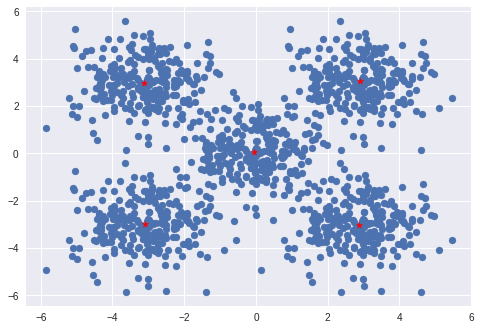

In [22]:
plt.scatter(data[:,0],data[:,1]) 
for i in range(1,6):
  means = best_param['means_{}'.format(i)]
  plt.scatter(means[0],means[1],marker='*',color= 'r')